# Workflow.

1. Purpose of that notebook.
2. Data.
3. Evaluation of model.
4. Features breakdown.
5. Modelling.


## 1. Purpose of that notebook.

Predict the Spending Score of mall customers using clustering model. Tune the hyperparameters, and check for improvements.

## 2. Data.

Data is taken from Kaggle datasets section: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## 3. Evaluation of model.

The model should make meaningful clusterization.

## 4. Features.

1. CustomerID - identification number.
2. Genre - sex.
3. Age - age in years.
4. Annual Income ($k) - yearly income in dollars.
5. Spending Score (1-100) - score assigned by the mall based on customer behavior and spending nature.

## Preparation of tools.

In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Models
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

# Process
from sklearn.pipeline import Pipeline

# Preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
# # Encoding
# categorical_features = ['Genre']
# categorical_transformer = Pipeline(steps=[
#     ("onehot", OneHotEncoder())
# ])

# # Setup preprocessor
# preprocessor = ColumnTransformer(transformers=[
#     ("categorical", categorical_transformer, categorical_features)
# ])

# Setup model
sc = Pipeline(steps=[
    ("model", SpectralClustering())
])

# Prepare hyperparameters
pipe_grid = {
    "model__assign_labels": "kmeans",
    "model__affinity": "rbf",
    "model__n_neighbors": 50,
    "model__n_clusters": 5
}

# Fitting model
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
clusters = sc.fit_predict(X)

df["Clusters"] = clusters

/Users/vagiz/Desktop/desktop_vagiz/Programming/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:369: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(


In [5]:
df["Clusters"].value_counts()

6    195
0      2
3      1
1      1
2      1
Name: Clusters, dtype: int64

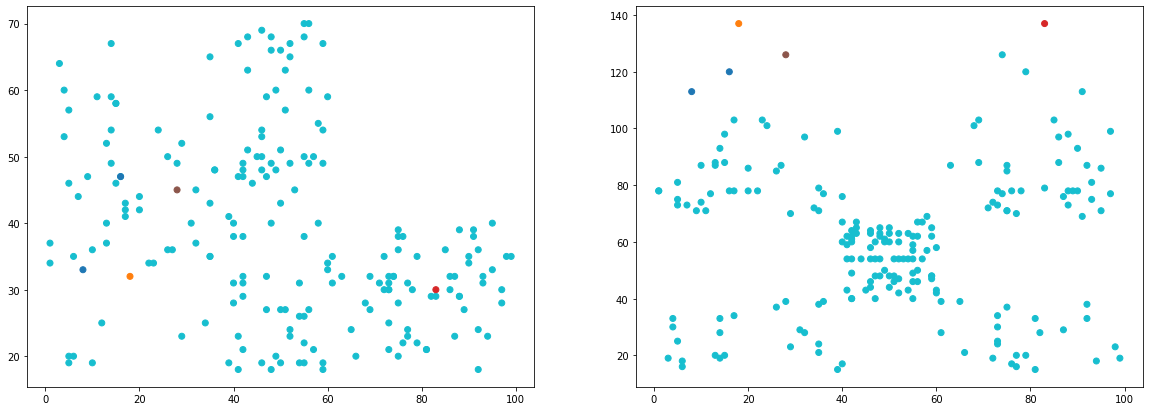

In [6]:
# Plotting results
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(20, 7))

x = df["Spending Score (1-100)"]
y = df["Age"]
c = df["Clusters"]

ax1.scatter(x=x, y=y, c=c, cmap='tab10')

x = df["Spending Score (1-100)"]
y = df["Annual Income (k$)"]
c = df["Clusters"]

ax2.scatter(x=x, y=y, c=c, cmap="tab10")

In [7]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")

# Setup model
sc = Pipeline(steps=[
    ("model", KMeans())
])

# Prepare hyperparameters
pipe_grid = {
    "model__n_clusters": 5,
    "model__init": 'k-means++',
    "model__random_state": 4,
    "model__algorithm": "full"
}

# Fitting model
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
clusters = sc.fit_predict(X)

df["Clusters"] = clusters

In [8]:
df["Clusters"].value_counts()

6    47
1    38
0    28
2    24
4    21
3    21
7    11
5    10
Name: Clusters, dtype: int64

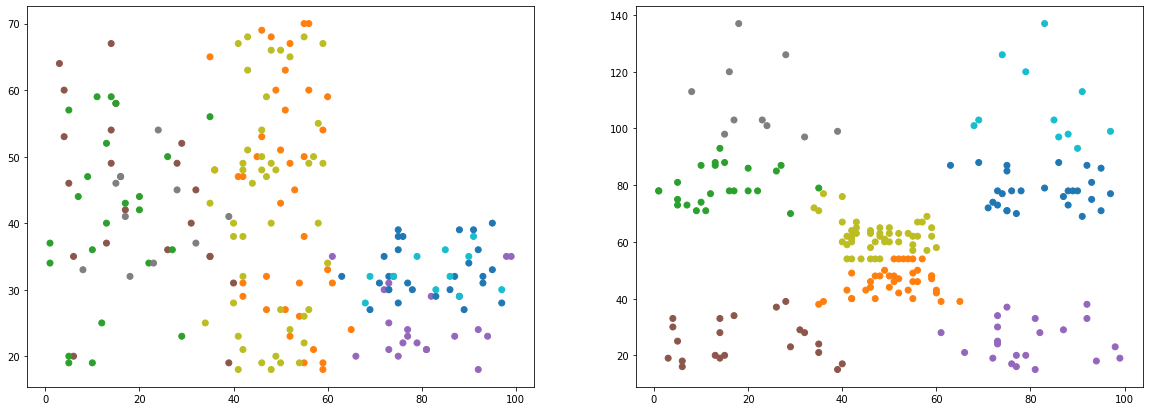

In [9]:
# Plotting results
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(20, 7))

x = df["Spending Score (1-100)"]
y = df["Age"]
c = df["Clusters"]

ax1.scatter(x=x, y=y, c=c, cmap='tab10')

x = df["Spending Score (1-100)"]
y = df["Annual Income (k$)"]
c = df["Clusters"]

ax2.scatter(x=x, y=y, c=c, cmap="tab10")

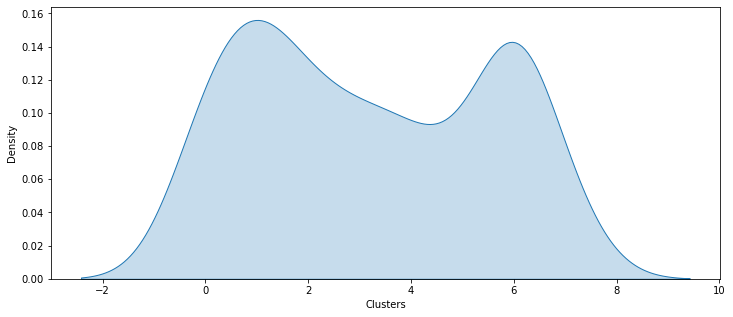

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.kdeplot(x=df["Clusters"],
                 fill=True,
                 label=True)